In this notebook we will explore our dataset that contains data on loans the Brazilian government provided to University Students in a program called "FIES". First, the data is loaded:

In [5]:
import pandas as pd

xl_file = pd.read_excel("base_df.xlsx")



Our sample has 37 features and 637822 observations.

In [14]:
xl_file.shape

(637822, 37)

In [15]:
xl_file.head()

,NU_ANO_SEMESTRE_INSCRICAO,SG_SEXO,DS_OCUPACAO,DS_ESTADO_CIVIL,VL_RENDA_FAMILIAR_BRUTA_MENSAL,VL_RENDA_PESSOAL_BRUTA_MENSAL,NO_MUNICIPIO,SG_UF,DS_RACA_COR,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,...,NU_PERCENT_SOLICITADO_FINANC,VL_FINANCIADO_SEMESTRE,VL_FINANC_RECURSO_ALUNO,VL_TOTAL_FINANCIAMENTO,VL_LIMITE_GLOBAL,dt_inicio_cont,fase_contrato,nu_dias_atraso,vl_divida,ANO_NASC
0,12014,F,Vendedor e prestador de serviÃ§os do comÃ©rcio...,Solteiro,728.74,728.74,NaN,NaN,P,S,...,100,1683.18,0.0,13465.44,15730.80,2014-05-02,Amortizacao,0,14549.68,1991
1,12013,F,Outros trabalhadores de serviÃ§os diversos,Solteiro,553.35,553.35,NaN,NaN,P,S,...,100,2650.50,0.0,15903.00,16800.75,2013-02-13,Amortizacao,0,12139.80,1990
2,22014,F,Estudante,Solteiro,5962.49,0.00,NaN,NaN,P,N,...,100,26810.85,0.0,321730.20,377937.00,2014-08-12,Utilizacao,0,397349.62,1996
3,12012,F,Estudante,Solteiro,21671.74,0.00,NaN,NaN,B,N,...,100,32065.32,0.0,384783.84,368181.00,2012-03-20,Utilizacao,0,434901.80,1991
4,22011,F,Estudante,Solteiro,1000.00,0.00,NaN,NaN,B,S,...,100,2595.00,2595.0,51900.00,25612.50,2011-09-23,Amortizacao,682,27518.91,1992


Now I will check which variables are available and their respective type:

In [11]:
xl_file.dtypes

NU_ANO_SEMESTRE_INSCRICAO                  int64
SG_SEXO                                   object
DS_OCUPACAO                               object
DS_ESTADO_CIVIL                           object
VL_RENDA_FAMILIAR_BRUTA_MENSAL           float64
VL_RENDA_PESSOAL_BRUTA_MENSAL            float64
NO_MUNICIPIO                              object
SG_UF                                     object
DS_RACA_COR                               object
ST_ENSINO_MEDIO_ESCOLA_PUBLICA            object
NU_ANO_CONCLUSAO_ENSINO_MEDIO            float64
NU_SEMESTRE_REFERENCIA                     int64
SG_UF_CURSO                               object
NO_CURSO                                  object
VL_AVALIACAO_IGC                         float64
VL_FAIXA_CPC                             float64
VL_FAIXA_CC                              float64
QT_SEMESTRES_CURSO                         int64
QT_SEMESTRE_CONCLUIDO                      int64
QT_SEMESTRE_FINANCIAMENTO                  int64
QT_MESES_FINANC_SEME

Inspecting some variables:

In [16]:
xl_file["NO_CURSO"].value_counts().head(10)

DIREITO                   98327
ADMINISTRAÇÃO             53047
ENGENHARIA CIVIL          51871
ENFERMAGEM                40305
PEDAGOGIA                 37172
PSICOLOGIA                31372
CIÊNCIAS CONTÁBEIS        22619
ENGENHARIA DE PRODUÇÃO    20897
EDUCAÇÃO FÍSICA           20731
FISIOTERAPIA              20121
Name: NO_CURSO, dtype: int64

In [17]:
xl_file['VL_RENDA_FAMILIAR_BRUTA_MENSAL'].value_counts().head(10)

1000.0    16181
724.0     14727
800.0     12313
1500.0    11522
1200.0    10563
2000.0    10301
678.0     10185
700.0      8009
900.0      7908
600.0      7051
Name: VL_RENDA_FAMILIAR_BRUTA_MENSAL, dtype: int64

In [18]:
xl_file["fase_contrato"].unique()

array(['Amortizacao', 'Utilizacao', 'Carencia', 'Liquidacao'],
      dtype=object)

In [ ]:
Sample Statistics:

In [25]:
xl_file.describe()

,NU_ANO_SEMESTRE_INSCRICAO,VL_RENDA_FAMILIAR_BRUTA_MENSAL,VL_RENDA_PESSOAL_BRUTA_MENSAL,NU_ANO_CONCLUSAO_ENSINO_MEDIO,NU_SEMESTRE_REFERENCIA,VL_AVALIACAO_IGC,VL_FAIXA_CPC,VL_FAIXA_CC,QT_SEMESTRES_CURSO,QT_SEMESTRE_CONCLUIDO,...,VL_SEMESTRE_COM_DESCONTO,VL_SEMESTRE_ATUAL,NU_PERCENTUAL_COMPROMETIMENTO,NU_PERCENT_SOLICITADO_FINANC,VL_FINANCIADO_SEMESTRE,VL_FINANC_RECURSO_ALUNO,VL_TOTAL_FINANCIAMENTO,VL_LIMITE_GLOBAL,nu_dias_atraso,vl_divida
count,637822.000000,6.378220e+05,637822.000000,623344.000000,637822.0,635485.000000,494869.000000,439392.000000,637822.000000,637822.000000,...,637822.000000,637822.000000,637822.000000,637822.000000,6.378220e+05,637822.000000,637822.000000,637822.000000,637822.000000,637822.000000
mean,15894.114507,2.154542e+03,734.457629,153.727834,12015.0,3.161023,2.809673,3.677932,8.875370,3.621203,...,5746.100631,5699.291537,145.762809,94.094990,9.973662e+13,458.156601,50137.744192,50795.837882,332.436799,50219.897849
std,4873.061258,2.892324e+03,905.847817,349.570389,0.0,0.576339,1.207784,0.685886,1.646459,2.168466,...,4177.270342,4163.466858,134.063725,14.058259,9.392539e+14,1337.603175,47961.285900,46979.102714,459.818109,51960.990018
min,12009.000000,4.000000e+00,0.000000,0.000000,12015.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,600.000000,600.000000,0.000000,50.000000,3.000000e+02,0.000000,600.000000,1121.100000,0.000000,0.000000
25%,12013.000000,9.414900e+02,0.000000,7.000000,12015.0,3.000000,3.000000,3.000000,8.000000,2.000000,...,3803.160000,3769.605000,75.590000,100.000000,3.361500e+03,0.000000,27704.400000,27377.500000,0.000000,22453.375000
50%,12014.000000,1.587000e+03,700.000000,10.000000,12015.0,3.000000,3.000000,4.000000,10.000000,3.000000,...,5020.720000,4987.515000,110.350000,100.000000,4.608070e+03,0.000000,42121.840000,43060.145000,57.000000,39904.855000
75%,22013.000000,2.691233e+03,1038.637500,12.000000,12015.0,3.000000,4.000000,4.000000,10.000000,5.000000,...,6342.180000,6288.130000,171.600000,100.000000,5.899020e+03,0.000000,57825.000000,59999.620000,600.000000,62050.492500
max,22014.000000,1.600000e+06,200000.000000,2012.000000,12015.0,5.000000,5.000000,5.000000,18.000000,14.000000,...,41499.900000,41499.900000,9695.500000,100.000000,9.999940e+15,20439.270000,580998.600000,673441.990000,5246.000000,635552.520000


Follow some histograms of the distribution os specific variables

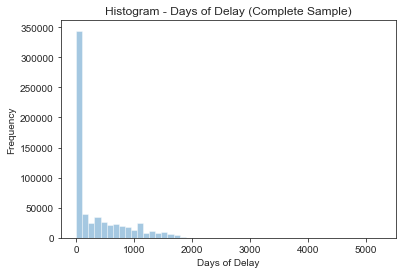

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("ticks")

graph_1 = sns.distplot(xl_file["nu_dias_atraso"],kde=False)
graph_1.set(xlabel='Days of Delay', ylabel='Frequency')
plt.title("Histogram - Days of Delay (Complete Sample)")
plt.show()



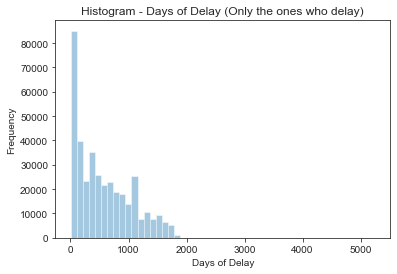

In [35]:
sns.set_style("ticks")
DATA = xl_file.loc[xl_file["nu_dias_atraso"]>0]
graph_1 = sns.distplot(DATA["nu_dias_atraso"], kde=False)
graph_1.set(xlabel='Days of Delay', ylabel='Frequency')
plt.title("Histogram - Days of Delay (Only the ones who delay)")
plt.show()

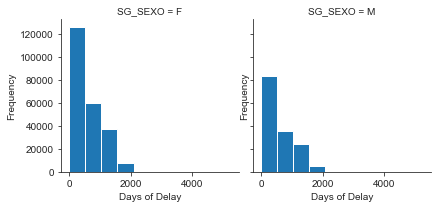

In [41]:
sns.set_style("ticks")
graph_2 = sns.FacetGrid(DATA, col="SG_SEXO")
graph_2.map(plt.hist, "nu_dias_atraso")
graph_2.set(xlabel='Days of Delay', ylabel='Frequency')


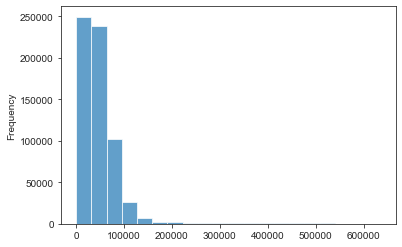

In [44]:
xl_file['vl_divida'].plot.hist(bins=20, alpha=.7)